# Introduction

## Context

Hello World!

In this notebook, I intend to explore fundamental concepts of [LangChain](https://www.langchain.com/). The term LangChain has rapidly become a common household term for anyone working in even the remote vacinity of AI/LLMs. However, for those that are looking to get into this domain and start exploring, it can be quite a frustrating task to understand where to start. In fact, due to a lack of access to a "Beginners Guide", I often see many people discouraged and give up before even starting! This is the first gap I hope to bridge with this notebook.

Additionally, I've come across numerous introductory articles and videos on LangChain that describe it in vague, abstract terms. These "hazy explanations" seem to be made with ill intent. Rather than spending time to learn concepts in-depth and teaching us how to implement them, these creators seek to have catchy clickbait titles with shallow explanations so that they can move on to churning more clickbait on other trending topics. After going through such content, I am left even more flustered and demotivated to explore further. The second gap I intend to address in this notebook is digesting concepts through implimentation.

**LangChain concepts I intend to address in this notebook:**
1. What is LangChain?
2. Why should we use LangChain?
3. LangChain Components:
    - LLM Classes
    - Prompt Templates
    - Chains
    - Runnables

**Additional concepts that will get covered:**
1. Ollama
2. Duckduckgo Search Results via API
3. Webscraping with BeautifulSoup

## Use Case

As stated, I want this note book to be an explanation via implemntation. So first, let us come up with an exciting use case for leveraging LangChain.

Huh, how do we do this? Without fundamentally knowing what LangChain is, how can we identify a use case for implementing it?

Well, we could just ask ChatGPT!

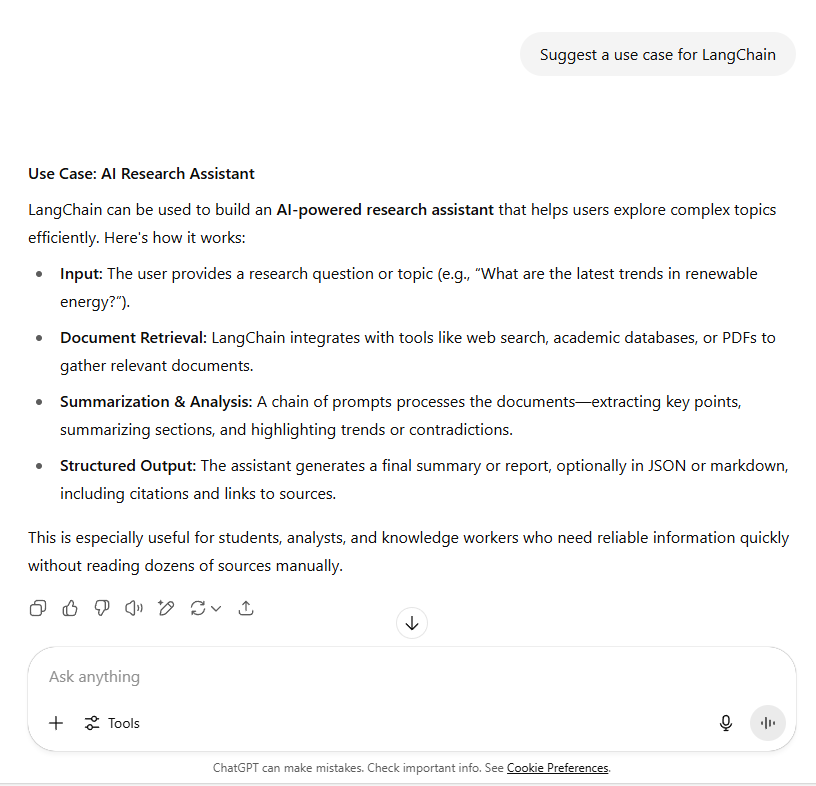

**Please note, every time we get to a roadblock and not know how to proceed, AI is our friend!**

Well, we now  have a use case!

**Let's first scope our project!**

## Scope

Our goal is to create an AI research assistant. For now, let's not be too ambituous and aim for a PhD level research assistant. Let's aim for a research assistant that can create highscool level reports based on the subject matter provided by the user.

First, let's understand how a highschooler would go about creating a report. On that basis, we can define what steps an AI flow should contain in its pipeline.

Steps for a human to create a school report:
1. Select a topic
2. Break the report down into subtopics by identifying key elements
3. Find references on each subtopic and create notes
4. Create the final report by summarize the notes on each topic into sections within the report

In our flow, the user will be providing the topic as an input, so we do not have to be concerned with the AI selecting the topic. Additionally, we may want the user to provide the number of subtopics they are looking for. So we will accept that as an input to the pipeline as well.

**Sumamry:**

Input: Topic Name, Number of Subtopics

Output: Highschool Level Report

**Now that we have an understanding of how we want to proceed, let's get started!**

# Step 1: Querying an LLM

## Ollama

First and foremost, while working with LLMs, we obviously need an LLM that we can call and get a response from. For this, there are multiple options:
1. We can either use proprietary models (ex. GPT, Claude, Gemini, etc.) - This has an associated cost as each call will incur an expense
2. We can run open-source LLMs on our own system - This won't incur any costs but the models are not as powerful and latency is higher

For the purpose of this notebook, let's go with option 2 for now.

In [ ]:
# Need to install Ollama? Run the following command:
# !pip install ollama

In [1]:
# Importing Ollama
from ollama import chat

# Calling the LLM with the Ollama Python API
# Let's ask a question - "Who was Alan Turing"
response = chat(model='llama3.2:latest', messages=[
  {
    'role': 'user',
    'content': 'Generate a highscool level report on the history of the internet with 3 suptopics',
  },
])

In [2]:
# Displaying the response
print(response['message']['content'])

**The History of the Internet**

**I. The Early Years: ARPANET and the Birth of the Internet (1960s-1980s)**

The internet as we know it today was born in the 1960s, when the United States Department of Defense's Advanced Research Projects Agency (ARPA) funded a project to create a network of computers that could communicate with each other. This project, called ARPANET, was designed to enable researchers and scientists to share information and collaborate on projects.

In 1969, the first message was sent over ARPANET, from a computer at UCLA to a computer at Stanford Research Institute (SRI). The network was initially used by government agencies and universities, but it quickly expanded to include other networks and institutions.

In the 1980s, the Internet Protocol (IP) was developed, which allowed different networks to communicate with each other and form a single, unified network. This marked the beginning of the modern internet as we know it today.

**II. The World Wide Web and th

And we get a response!

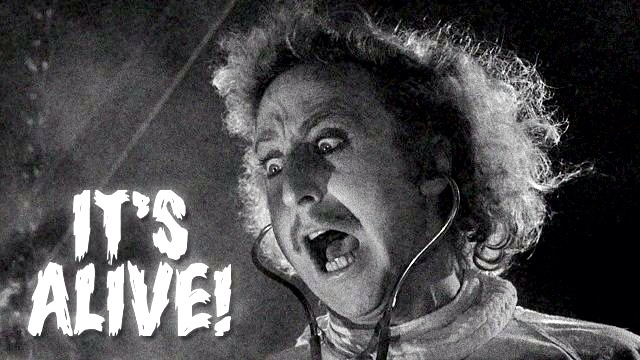

_[image](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.cjsr.com%2F2017%2F06%2Fits-alive-online-streaming-returns%2F&psig=AOvVaw3x52QsgPORkaufyt2P59pG&ust=1751048005797000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCODI0KfYj44DFQAAAAAdAAAAABAE)_

## Run Other LLMs

Well, now that we have gotten a response on a local instance of Llama 3.2 run locally, let's try the same question on some other LLM models!

Let's try it on GPT!

...

However, we will need to install a seperate library for that won't we? [OpenAI Python API library](https://github.com/openai/openai-python)

Fine then! Let's not do that. Let's try it on Claude!

...

Nope, we need another library for that too. [Anthropic Python API library](https://github.com/anthropics/anthropic-sdk-python)

Also, please note. If you visit the links mentioned above, you will notice tha it is not only the libraries that change. The class names that we need to import are different, the method names to make requests to the LLM are different, the response from the LLM has a different dictionary format, etc.

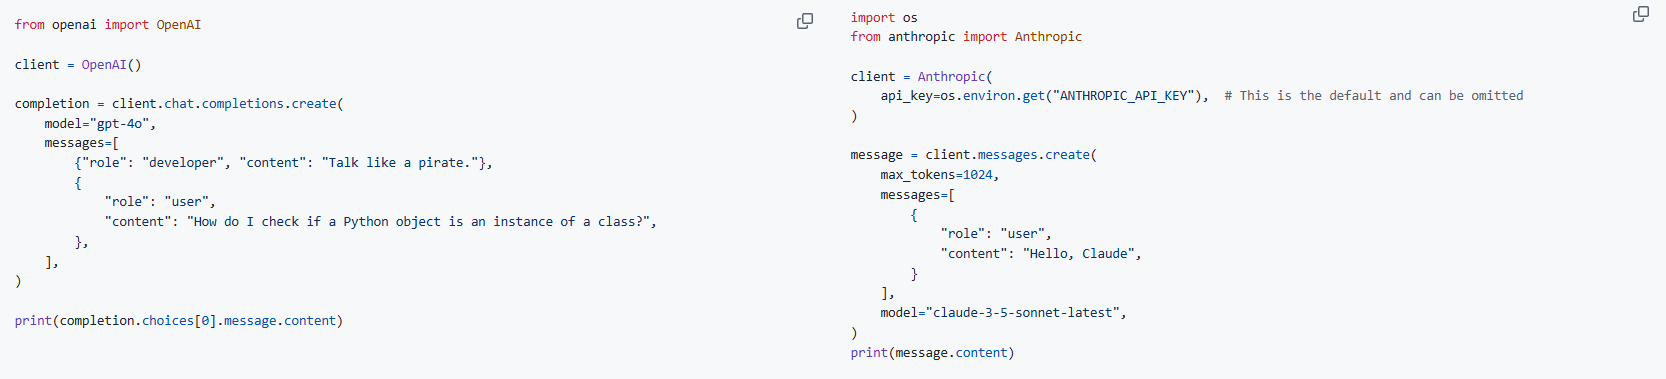

[OpenAI](https://github.com/openai/openai-python), [Anthropic](https://github.com/anthropics/anthropic-sdk-python)

So, this means that if we develop some 1000 lines of code in which LLMs play an integral part, we will have to refactor the code each time we want to call a different LLM. If we want to compare the outputs from different LLMs, this is bound to happen.

**This just isn't sustainable!**

If only there was one solution where we could simply just replace the model we are calling in one place and not have to touch the code anywhere else...

<!-- 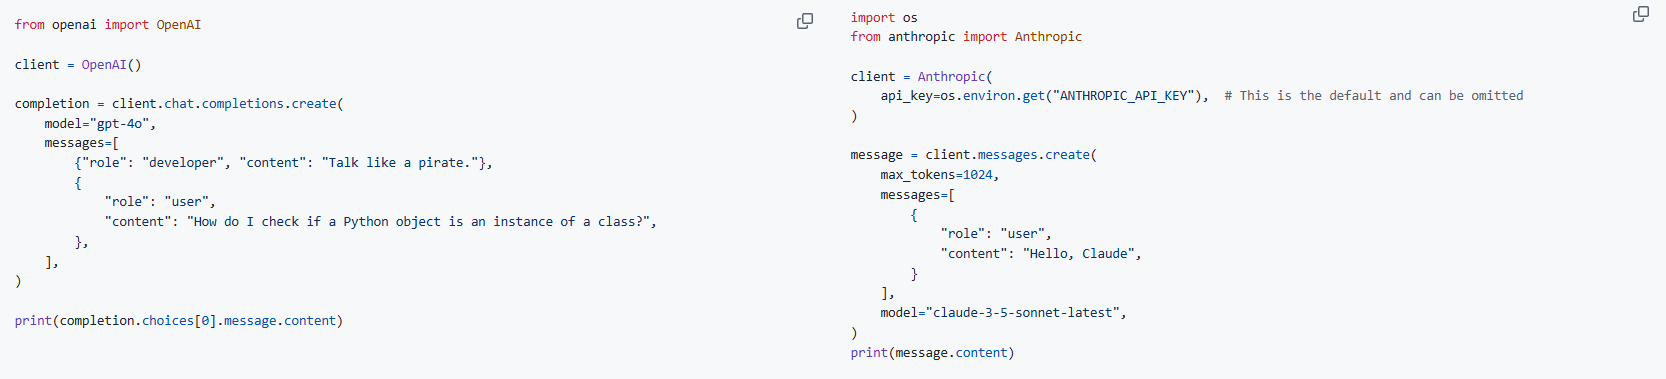 -->
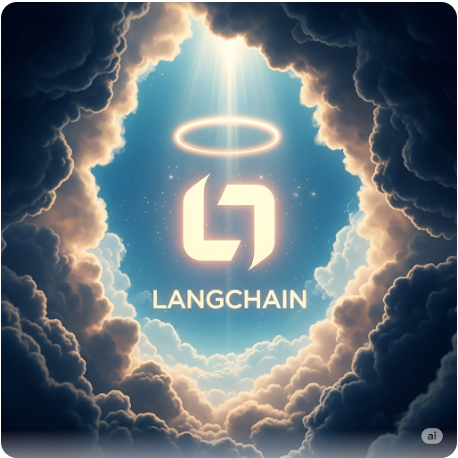

*Generated using Gemini*

*(Note: There are deffinitely more reasons to utilize LangChain, especially when we need to rely on chain-of-though prompting, but we can look into those reasons later)*

LangChain allows for partners to contribute to the library to build a "client" for their LLM ([see here](https://github.com/langchain-ai/langchain/tree/master/libs/partners)). To see the source code of a partner, click on: *<parner_name>* / langchain_*<parner_name>* / llms.py 

(example for Ollama: ollama / langchain_ollama / [llms.py](https://github.com/langchain-ai/langchain/blob/master/libs/partners/ollama/langchain_ollama/llms.py))

Most of the LLM Clients are built using the BaseLLM class from langchain_core.



## Ollama with LangChain

Let us try, getting a response from the locally running Ollama instance using the LangChain library!

In [3]:
from langchain_ollama.llms import OllamaLLM

# Importing OllamaLLM from LangChain - the LLM client for Ollama:
model = OllamaLLM(model="llama3.2:latest", run_local=True)

# Calling the LLM
response = model.invoke("Generate a highscool level report on the history of the internet with 3 suptopics")

In [4]:
# Displaying the response
print(response)

**The Evolution of the Internet: A Decade-by-Decade Overview**

**Topic 1: The Birth and Early Years of the Internet (1960s-1980s)**

The internet has its roots in the United States Department of Defense's Advanced Research Projects Agency (ARPA). In the 1960s, ARPA funded a project called ARPANET, which aimed to create a network of computers that could communicate with each other. The first message sent over ARPANET was on October 29, 1969, from a computer at UCLA to one at Stanford Research Institute (SRI). In the 1970s and 1980s, other networks such as the National Science Foundation Network (NSFNET) and the Internet Protocol (IP) were developed. These early networks laid the foundation for the modern internet.

**Topic 2: The World Wide Web and Netscape (1990s)**

In 1989, British computer scientist Tim Berners-Lee invented the World Wide Web, a system of interlinked hypertext documents that could be accessed via web browsers. This innovation revolutionized the way people accessed 

**Amazing! We just used the LangChain wrapper for Ollama!**

## LangChain: Prompt Templates

What do we do if we want to repeat the process for differnet topics?

For example, we want one report on "The History of the Internet" with 3 subtopics and we also want a report on "The History of Formula 1" with 5 subtopics.

The straight forward solution is to manually type the same prompt again and again. However, if we want to use this process as an automated pipeline, we cannot rely on manually entering the prompt.

What we need is a feature offered by LangChain called Prompt Templates.

In [11]:
# Importing PromptTemplate from LangChain
from langchain_core.prompts import PromptTemplate

# Creating a prompt template for generating reports using the from_template method
report_prompt = PromptTemplate.from_template("Generate a highschool level report on {topic} with {subtopics} subtopics")

In [12]:
# We can invoke the prompt template with specific values for the placeholders
report_prompt.invoke({"topic": "The History of the Internet", "subtopics": 3})

StringPromptValue(text='Generate a highschool level report on The History of the Internet with 3 subtopics')

In [13]:
# The invoke fuunction returns a StringPromptValue object- the "text" parameter is a string with the placeholders replaced by the provided values
report_prompt.invoke({"topic": "The History of the Internet", "subtopics": 3}).text

'Generate a highschool level report on The History of the Internet with 3 subtopics'

Now, it becomes easy to create multiple prompts using this template

In [14]:
print(report_prompt.invoke({"topic": "The History of the Internet", "subtopics": 3}).text)
print(report_prompt.invoke({"topic": "The History of Formula 1", "subtopics": 5}).text)

Generate a highschool level report on The History of the Internet with 3 subtopics
Generate a highschool level report on The History of Formula 1 with 5 subtopics


## Issues with Preticted Text

We are seeing responses from the LLM, but keep in mind, a Large Language Model simply "predicts" what the next set of words should be based on the prompt. These predictions are based off of the large pool of textual data the LLM would've been trained on.

The problem with the content being generated as a prediction is that we don't know which words are predicted incorrectly. An important fact could've been a mis-prediction resulting in what we call a **hallucination**.

We also don't have any references within the pool of training data which is informing the prediction. So, we do not have anything to cross-reference the facts.

How do we fix this problem?

One way would be to provide the LLM

# Step 2: Creating Subtopics